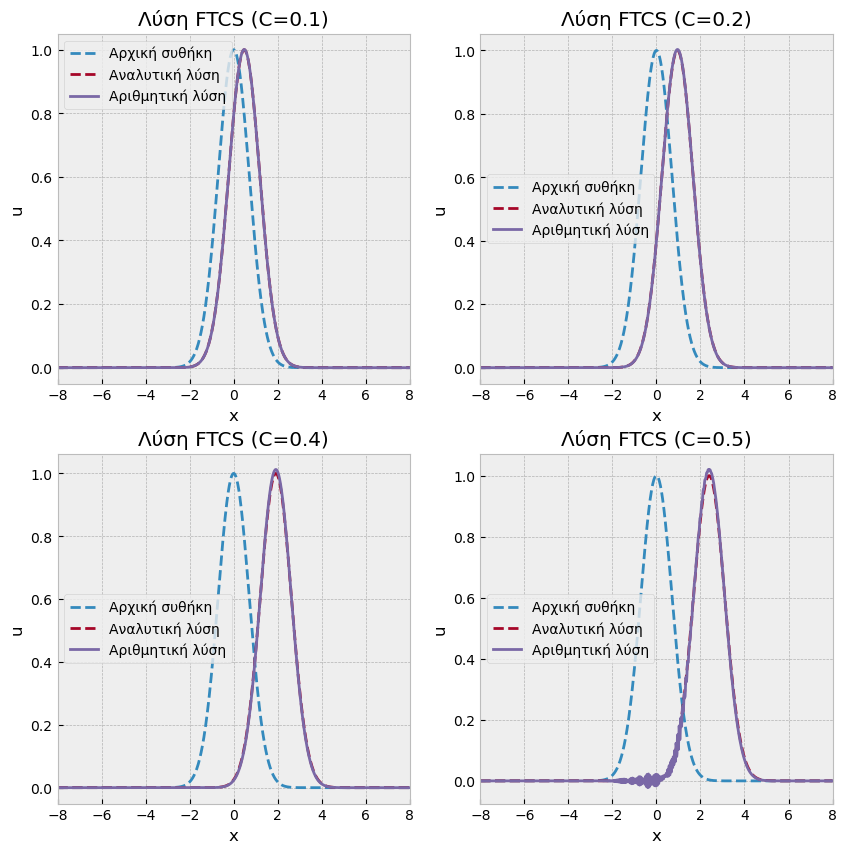

In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

# Define the grid
nx = 1000
xmin = -8
xmax = 8
x = np.linspace(xmin, xmax, nx)
dx = (xmax - xmin) / (nx - 1)

# Define the number of time steps
nt = 300
tstart = 0
tend = 3
dt = (tend - tstart) / (nt - 1)



# Define the Courant number
C_values = np.array([0.1, 0.2, 0.4, 0.5])


# Define the initial condition
u0 = np.exp(-x ** 2)

# Define the FTCS method
def ftcs(nt, nx, u0, C):
    u = np.zeros((nt, nx))
    u[0] = u0.copy()
    for n in range(nt-1):
        u[n+1, 1:-1] = u[n, 1:-1] - (C/2) * (u[n, 2:] - u[n, :-2])
    return u

# Create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

# Loop over Courant numbers
for i, C in enumerate(C_values):

    # Compute the solution using FTCS
    u_numerical = ftcs(nt, nx, u0, C)
    # Compute the analytic solution
    u_analytic = np.exp(-(x - C * (dx / dt) * tend)**2)

    # Plot the solution
    axs[i].plot(x, u0, '--', label='Αρχική συθήκη')
    axs[i].plot(x, u_analytic, '--', label='Αναλυτική λύση')
    axs[i].plot(x, u_numerical[-1], label='Αριθμητική λύση')
    axs[i].set_xlim([xmin, xmax])
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("u")
    axs[i].set_title(f'Λύση FTCS (C={C})')
    axs[i].legend()

plt.show()



def upwind(nt, nx, u0, C):
    u = np.zeros((nt, nx))
    u[0] = u0.copy()
    for n in range(nt-1):
        u[n+1, 1:-1] = u[n, 1:-1] - C * (u[n, 1:-1] - u[n, :-2])
    return u

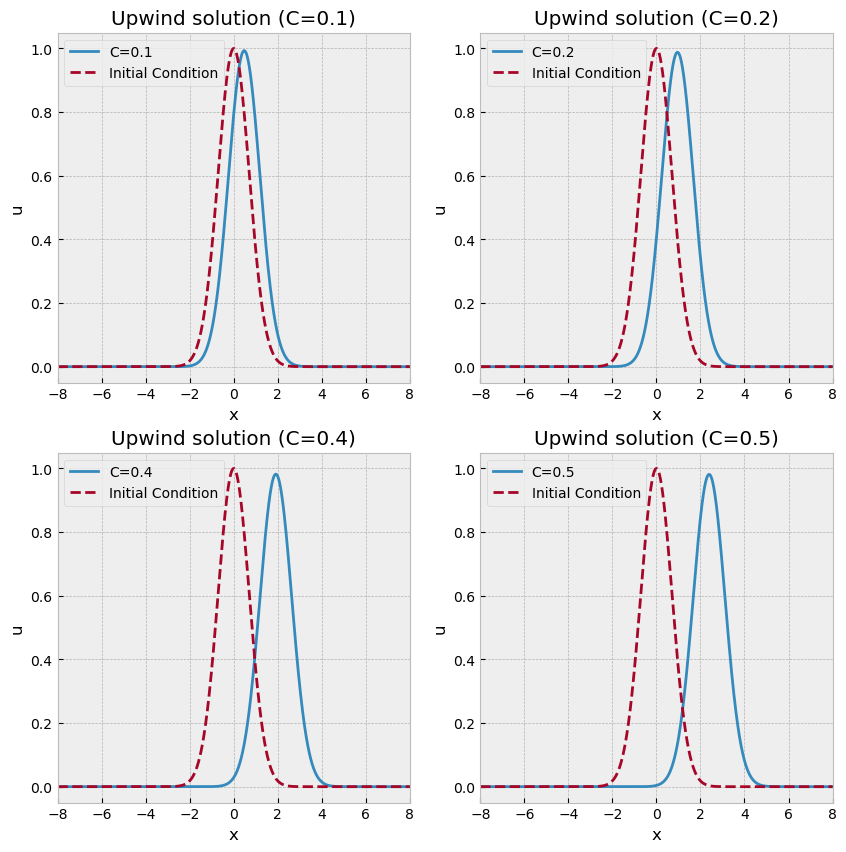

In [2]:
# Create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

# Loop over Courant numbers
for i, C in enumerate(C_values):

    # Compute the solution using upwind
    u = upwind(nt, nx, u0, C)
    
    # Plot the solution
    axs[i].plot(x, u[-1], label=f'C={C}')
    axs[i].plot(x, u0, '--', label='Initial Condition')
    axs[i].set_xlim([xmin, xmax])
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("u")
    axs[i].set_title(f'Upwind solution (C={C})')
    axs[i].legend()

plt.show()


In [ ]:
# downwind method
def downwind(nt, nx, u0, C):
    u = np.zeros((nt, nx))
    u[0] = u0.copy()
    for n in range(nt-1):
        u[n+1, 1:-1] = u[n, 1:-1] - C * (u[n, 1:-1] - u[n, 1:-1])
    return u

# plot solution



In [57]:
## generate code for the solution of 1D convection using the crack-nicolson method
def crank_nicolson(nt, nx, u0, C):
    """
    This function solves the 1D convection equation using the Crank-Nicolson method.
    
    Parameters:
        nt (int): Number of time steps
        nx (int): Number of grid points
        u0 (ndarray): Initial condition
        alpha (float): Courant number
        
    Returns:
        ndarray: Solution of the convection equation
    """
    # dx = 1 / nx
    # dt = 1 / nt
    # tend = nt * dt
    
    # x = np.linspace(0, 1, nx)
    u = np.zeros((nt, nx))
    u[0] = u0
    
    a = (-C/4) * np.ones(nx - 1)
    b =  np.ones(nx)
    c = (C/4) * np.ones(nx - 1)
    
    for n in range(nt - 1):
        d = u[n, 1:-1] - C/4 * (u[n, 2:] - u[n, :-2])
        u[n + 1, 1:-1] = np.linalg.solve((np.diag(a, -1) + np.diag(b) + np.diag(c, 1))[1:-1, 1:-1], d)
        # u[n + 1, 1:-1] = np.linalg.solve(np.diag(a, -1) + np.diag(b) + np.diag(c, 1), d[1:-1])
    
    return u


In [58]:
u = crank_nicolson(nt, nx, u0, 0.5)


In [60]:
u[-1]

array([ 0.00000000e+00, -1.65173037e-29,  7.75066775e-30, -1.53594611e-29,
        1.24721776e-29, -1.40069696e-29,  1.67273384e-29, -1.68088512e-29,
        2.35850948e-29, -2.93962754e-29,  4.48725499e-29, -5.87298213e-29,
        8.18059139e-29, -1.07795750e-28,  1.41069055e-28, -1.73696669e-28,
        2.13377794e-28, -2.57877233e-28,  3.08976760e-28, -3.65913473e-28,
        4.40046252e-28, -5.32976030e-28,  6.46623054e-28, -7.83856279e-28,
        9.51244413e-28, -1.14052015e-27,  1.34454538e-27, -1.56284152e-27,
        1.79563295e-27, -2.03789059e-27,  2.30038976e-27, -2.60438060e-27,
        2.96029421e-27, -3.36812449e-27,  3.82353077e-27, -4.29085657e-27,
        4.69153208e-27, -4.93133830e-27,  4.90963404e-27, -4.51628641e-27,
        3.67414150e-27, -2.38044494e-27,  6.96824766e-28,  1.24769385e-27,
       -3.23827524e-27,  5.02364626e-27, -6.38813234e-27,  7.18006146e-27,
       -7.37425110e-27,  7.16598001e-27, -6.98031339e-27,  7.44004769e-27,
       -9.34453672e-27,  

In [38]:
a = -C * np.ones(nx - 1)
b = (1 + C) * np.ones(nx)
c = -C * np.ones(nx - 1)


In [52]:
np.diag(a, -1).shape

(1000, 1000)

In [45]:
A = np.diag(a, -1) + np.diag(b) + np.diag(c, 1)

In [47]:
A

array([[ 1.5, -0.5,  0. , ...,  0. ,  0. ,  0. ],
       [-0.5,  1.5, -0.5, ...,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  1.5, ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  1.5, -0.5,  0. ],
       [ 0. ,  0. ,  0. , ..., -0.5,  1.5, -0.5],
       [ 0. ,  0. ,  0. , ...,  0. , -0.5,  1.5]])

In [42]:
am = np.diag(a, -1)

In [44]:
am

array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ..., -0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. , -0.5,  0. ]])

In [ ]:
    
    for n in range(nt - 1):
        d = u[n]
        u[n + 1, 1:-1] = np.linalg.solve((np.diag(a, -1) + np.diag(b) + np.diag(c, 1))[1:-1, 1:-1], d[1:-1])
        # u[n + 1, 1:-1] = np.linalg.solve(np.diag(a, -1) + np.diag(b) + np.diag(c, 1), d[1:-1])

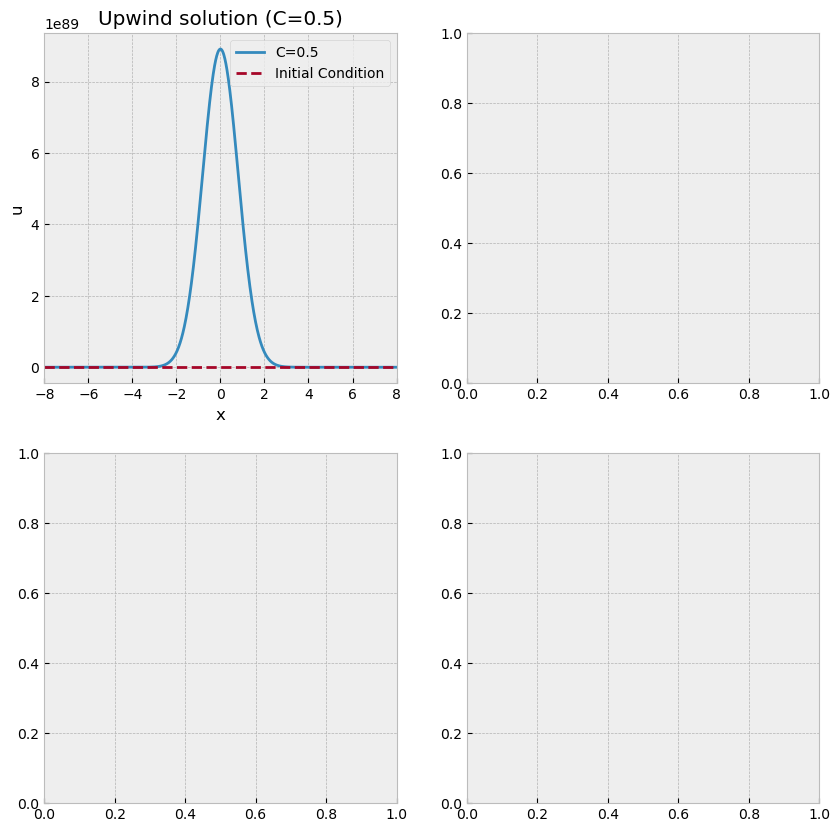

In [37]:
# Create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

C_values = [0.5]
# Loop over Courant numbers
for i, C in enumerate(C_values):

    # Compute the solution using upwind
    u = crank_nicolson(nt, nx, u0, 0.5)

    
    # Plot the solution
    axs[i].plot(x, u[-1], label=f'C={C}')
    axs[i].plot(x, u0, '--', label='Initial Condition')
    axs[i].set_xlim([xmin, xmax])
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("u")
    axs[i].set_title(f'Upwind solution (C={C})')
    axs[i].legend()

plt.show()

In [64]:
import numpy as np

# Define the grid
nx = 1000
xmin = -8
xmax = 8
x = np.linspace(xmin, xmax, nx)
dx = (xmax - xmin) / (nx - 1)

# Define the number of time steps
nt = 300
tstart = 0
tend = 3
dt = (tend - tstart) / (nt - 1)



# # Define the Courant number
# C_values = np.array([0.1, 0.2, 0.4, 0.5])


# Define the initial condition


# # 
# dx = L / (nx - 1)  # Grid spacing
# nt = 100  # Number of time steps
# dt = 0.01  # Time step size
# c = 1.0  # Wave speed
# r = c * dt / dx  # Courant number


[1.60381089e-28 2.08418326e-28 2.67229133e-28 3.46457276e-28
 4.44668975e-28 5.75277988e-28 7.38623906e-28 9.53757563e-28
 1.22450037e-27 1.57846326e-27 2.02585262e-27 2.60744622e-27
 3.34469685e-27 4.29884419e-27 5.51064024e-27 7.07337624e-27
 9.06033219e-27 1.16153002e-26 1.48656772e-26 1.90351558e-26
 2.43402926e-26 3.11315431e-26 3.97712496e-26 5.08113040e-26
 6.48509789e-26 8.27625057e-26 1.05528288e-25 1.34530018e-25
 1.71367014e-25 2.18230834e-25 2.77710467e-25 3.53283773e-25
 4.49122156e-25 5.70744117e-25 7.24843616e-25 9.20172001e-25
 1.16743326e-24 1.48049225e-24 1.87641082e-24 2.37712828e-24
 3.00976151e-24 3.80897669e-24 4.81775435e-24 6.09078285e-24
 7.69601181e-24 9.71956758e-24 1.22686103e-23 1.54785309e-23
 1.95179249e-23 2.45992266e-23 3.09870744e-23 3.90141416e-23
 4.90948799e-23 6.17492265e-23 7.76248086e-23 9.75326066e-23
 1.22482379e-22 1.53736493e-22 1.92865891e-22 2.41831532e-22
 3.03072126e-22 3.79627525e-22 4.75275386e-22 5.94718248e-22
 7.43795277e-22 9.297659

In [70]:
C = 0.5
a = -0.25 * C * np.ones(nx - 1)
b =  np.ones(nx)
c = 0.25 * C * np.ones(nx - 1)

# Initialize solution matrix
u = np.zeros((nt, nx))
u[0] = u0.copy()

# Solve using the implicit Crank-Nicolson scheme
for n in range(nt - 1):
    d = u[n,1:-1] + 0.25 * C * (u[n, 2:] - 2 * u[n, 1:-1] + u[n, :-2])
    u[n + 1, 1:-1] = solve_banded((1, 1), np.vstack((a, b, c)), d)

# Plot the results
plt.plot(x, u0, '--', label='Initial Condition')
plt.plot(x, u[-1], label='Numerical Solution')
plt.xlabel('x')
plt.ylabel('u')
plt.title('1D Convection - Crank-Nicolson Scheme (Implicit)')
plt.legend()
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 999 and the array at index 1 has size 1000

In [ ]:

# Define the initial condition
u = np.ones(nx)
u = np.exp(-x ** 2)
# u = np.exp(-x ** 2)


# Define the Crank-Nicolson matrix
A = np.zeros((nx, nx))
A[0, 0] = 1.0
A[-1, -1] = 1.0
for i in range(1, nx - 1):
    A[i, i - 1] = -0.5 * r
    A[i, i] = 1.0
    A[i, i + 1] = 0.5 * r

# Time-stepping loop
for n in range(nt):
    b = np.dot(A, u)
    u = np.linalg.solve(A, b)

# Print the final solution
print(u)


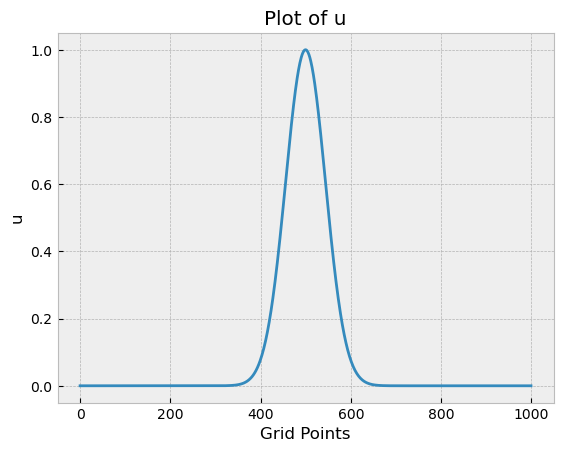

In [65]:
# plot u

# Plot u
plt.plot(u)
plt.xlabel('Grid Points')
plt.ylabel('u')
plt.title('Plot of u')
plt.show()